 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_df = pd.read_csv(
    whale_returns_csv,
    index_col = "Date",
    parse_dates = True,
    infer_datetime_format = True
)
whale_df.sort_index(inplace = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_clean = whale_df.dropna().copy()
whale_clean.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_df = pd.read_csv(
    algo_returns_csv,
    index_col = "Date",
    parse_dates = True,
    infer_datetime_format = True
)
algo_df.sort_index(inplace = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_clean = algo_df.dropna().copy()
algo_clean.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_historical.csv")
sp500_df = pd.read_csv(
    sp500_history_csv,
    index_col = "Date",
    parse_dates = True,
    infer_datetime_format = True
)
sp500_df.sort_index(inplace = True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily = sp500_df.pct_change()
sp500_daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_clean = sp500_daily.dropna().copy()
sp500_daily_clean.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
columns = ["S&P 500"]
sp500_daily_clean.columns = columns
sp500_daily_clean.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [62]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_clean, algo_clean, sp500_daily_clean], axis= 'columns', join= 'inner') 
reseted_combined_df = combined_df.reset_index()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

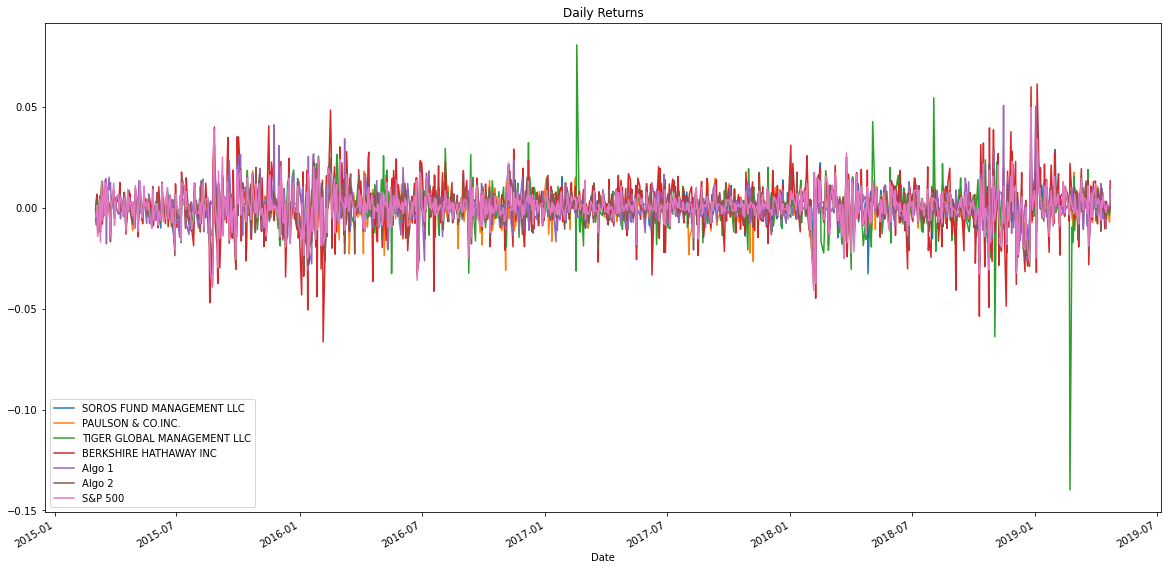

In [15]:
# Plot daily returns
combined_df.plot(figsize = (20,10), title = "Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

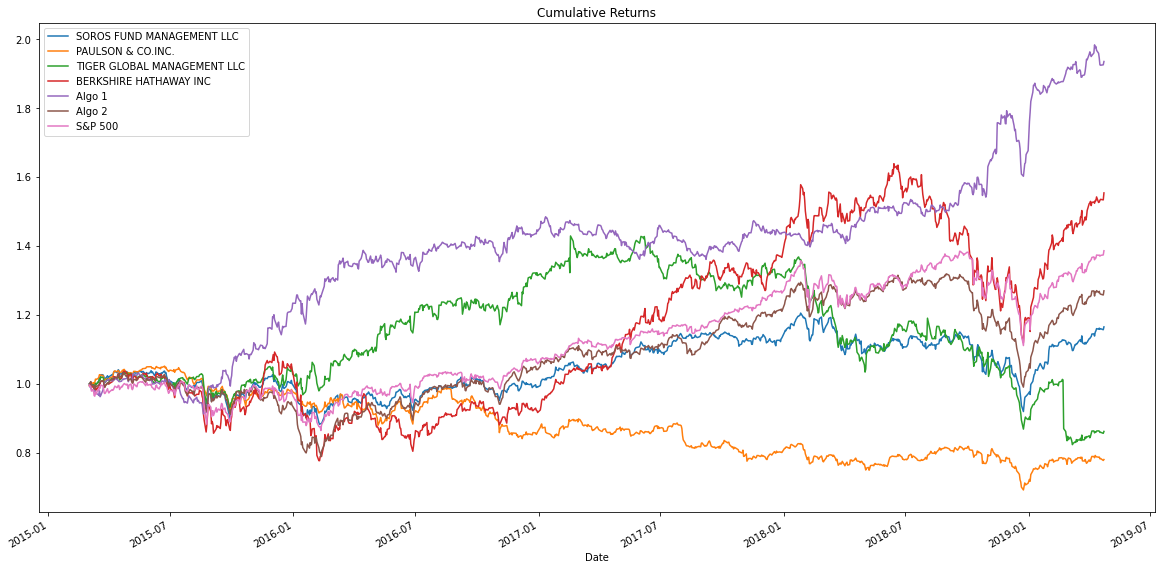

In [16]:
# Plot cumulative returns
cumulative_df = (1 + combined_df).cumprod()
cumulative_df.plot(figsize = (20,10), title = "Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

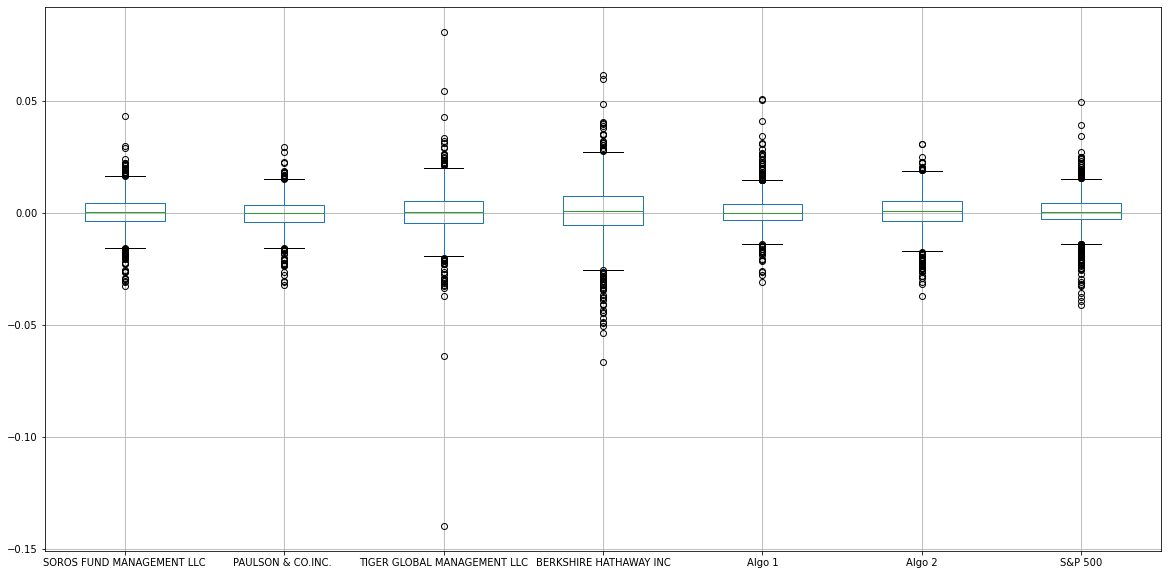

In [17]:
# Box plot to visually show risk
combined_df.boxplot(figsize = (20,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
#Berkshire and Tiger
std_df = combined_df.std()
std_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
def determined_risk():
    riskdict = {}
    iter = 0
    for portfolio in std_df:
        if portfolio > std_df["S&P 500"]:
            riskdict[std_df.index[iter]] = True
        else:
            riskdict[std_df.index[iter]] = False
        iter += 1 
    risk = pd.Series(data = riskdict)
    print(risk)
determined_risk()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = std_df * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

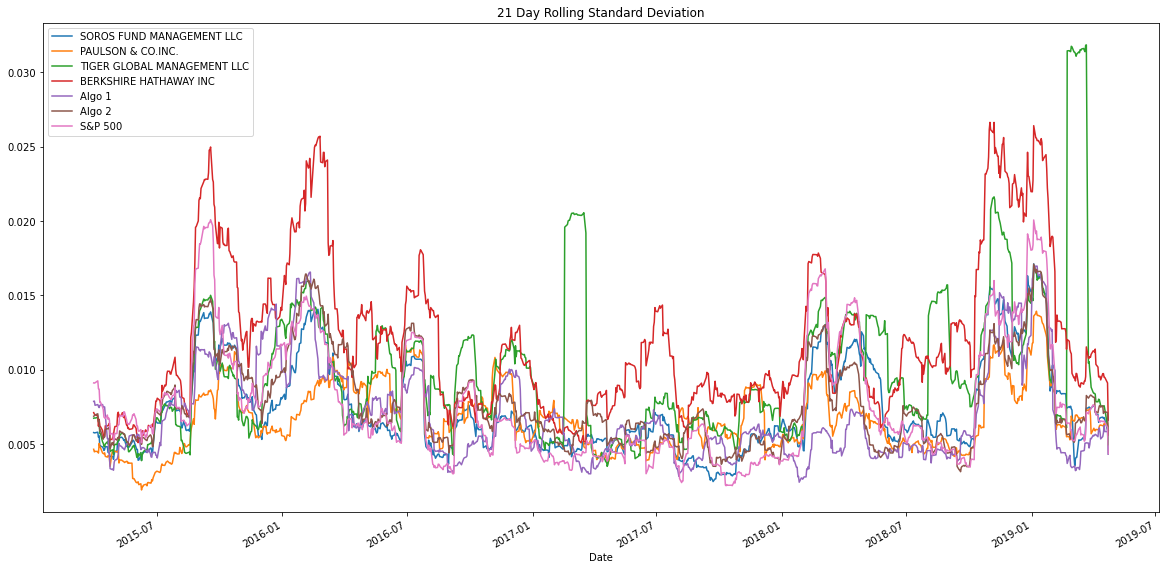

In [46]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window = 21).std().plot(figsize = (20,10), title = "21 Day Rolling Standard Deviation")

In [22]:
# Construct a correlation table
combined_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [43]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = combined_df['Algo 1'].cov(combined_df['S&P 500'])
variance = combined_df['Algo 1'].var()
algo_1_beta = covariance / variance

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

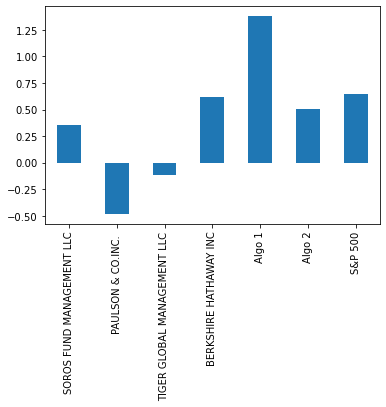

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
tsla_csv = Path("../Resources/tsla_close.csv")
tsla_df = pd.read_csv(
    tsla_csv,
    index_col = "Date",
    parse_dates = True,
    infer_datetime_format = True
)
tsla_df.rename(columns= {"Close":"TSLA"}, inplace = True)
tsla_df.head()

,TSLA
Date,
2015-03-02 16:00:00,39.47
2015-03-03 16:00:00,39.91
2015-03-04 16:00:00,40.49
2015-03-05 16:00:00,40.13
2015-03-06 16:00:00,38.78


In [28]:
# Read the second stock
ccl_csv = Path("../Resources/ccl_close.csv")
ccl_df = pd.read_csv(
    ccl_csv,
    index_col = "Date",
    parse_dates = True,
    infer_datetime_format = True
)
ccl_df.rename(columns= {"Close":"CCL"}, inplace = True)
ccl_df.head()

,CCL
Date,
2015-03-02 16:00:00,45.19
2015-03-03 16:00:00,44.69
2015-03-04 16:00:00,44.59
2015-03-05 16:00:00,45.47
2015-03-06 16:00:00,44.40


In [29]:
# Read the third stock
uso_csv = Path("../Resources/uso_close.csv")
uso_df = pd.read_csv(
    uso_csv,
    index_col = "Date",
    parse_dates = True,
    infer_datetime_format = True
)
uso_df.rename(columns= {"Close":"USO"}, inplace = True)
uso_df.head()

,USO
Date,
2015-03-02 16:00:00,146.56
2015-03-03 16:00:00,147.92
2015-03-04 16:00:00,152.08
2015-03-05 16:00:00,149.68
2015-03-06 16:00:00,145.92


In [30]:
# Read the fourth stock
tm_csv = Path("../Resources/tm_close.csv")
tm_df = pd.read_csv(
    tm_csv,
    index_col = "Date",
    parse_dates = True,
    infer_datetime_format = True
)
tm_df.rename(columns= {"Close":"TM"}, inplace = True)
tm_df.head()

,TM
Date,
2015-03-02 16:00:00,135.87
2015-03-03 16:00:00,135.40
2015-03-04 16:00:00,135.52
2015-03-05 16:00:00,134.90
2015-03-06 16:00:00,134.89


In [31]:
# Read the fifth stock
twtr_csv = Path("../Resources/twtr_close.csv")
twtr_df = pd.read_csv(
    twtr_csv,
    index_col = "Date",
    parse_dates = True,
    infer_datetime_format = True
)
twtr_df.rename(columns= {"Close":"TWTR"}, inplace = True)
twtr_df.head()

,TWTR
Date,
2015-03-02 16:00:00,48.15
2015-03-03 16:00:00,47.71
2015-03-04 16:00:00,47.57
2015-03-05 16:00:00,47.35
2015-03-06 16:00:00,46.75


In [32]:
#Concatenate all stocks into a single DataFrame
portfolio_df = pd.concat([tsla_df, ccl_df, uso_df, tm_df, twtr_df], axis = 'columns', join = 'inner')

In [58]:
# Reset the index
portfolio_df.reset_index(inplace=True)
portfolio_df.drop(columns = "Date")

,TSLA,CCL,USO,TM,TWTR
0,39.47,45.19,146.56,135.87,48.15
1,39.91,44.69,147.92,135.40,47.71
2,40.49,44.59,152.08,135.52,47.57
3,40.13,45.47,149.68,134.90,47.35
4,38.78,44.40,145.92,134.89,46.75
...,...,...,...,...,...
1043,51.73,53.73,109.44,122.88,39.29
1044,49.53,53.83,108.24,123.19,38.48
1045,47.03,54.42,104.72,123.62,38.67
1046,48.29,54.43,105.84,123.81,39.78


In [34]:
# Pivot so that each column of prices represents a unique symbol


In [35]:
# Drop Nulls
portfolio_df.dropna()
portfolio_df.head()

,TSLA,CCL,USO,TM,TWTR
Date,,,,,
2015-03-02 16:00:00,39.47,45.19,146.56,135.87,48.15
2015-03-03 16:00:00,39.91,44.69,147.92,135.40,47.71
2015-03-04 16:00:00,40.49,44.59,152.08,135.52,47.57
2015-03-05 16:00:00,40.13,45.47,149.68,134.90,47.35
2015-03-06 16:00:00,38.78,44.40,145.92,134.89,46.75


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Calculate weighted portfolio returns
portfolio_returns = portfolio_df.pct_change()
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
custom_returns = portfolio_returns.dot(weights)
custom_returns.rename(columns={"0":"Custom"}, inplace=True)


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [65]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
large_df = pd.concat([reseted_combined_df, custom_returns], axis='columns', join= 'inner')
large_df

,0,1,2,3,4,5,6,7,8


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [42]:
# Risk
large_df.std()

Date                          NaN
SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
S&P 500                       NaN
0                             NaN
dtype: float64

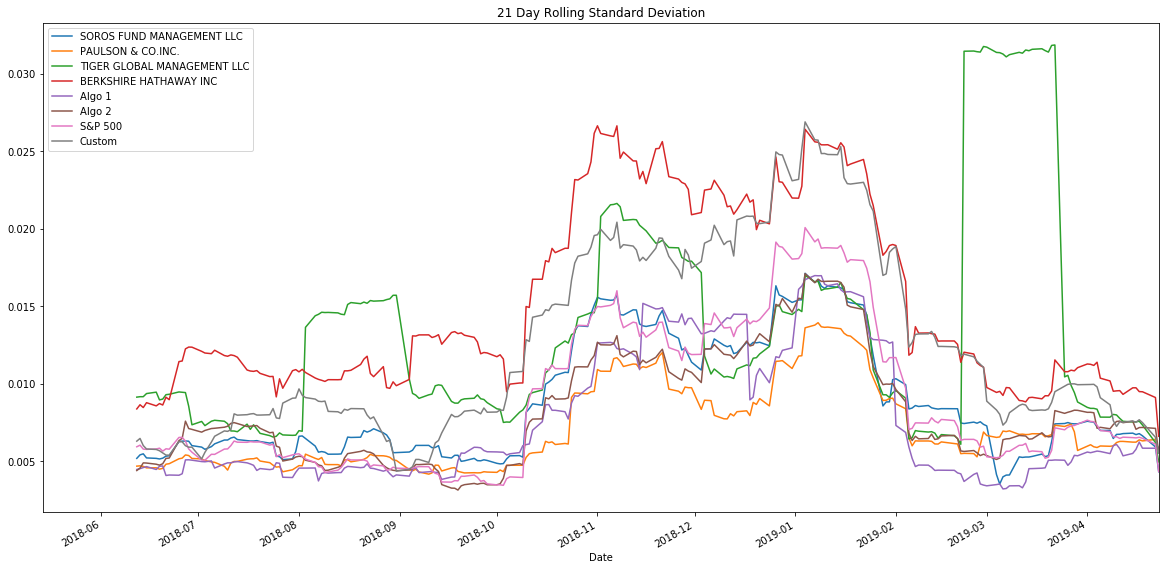

In [39]:
# Rolling
large_df.rolling(window = 21).std().plot(figsize = (20,10), title = "21 Day Rolling Standard Deviation")

In [40]:
# Annualized Sharpe Ratios
sharpe_ratios_2 = (large_df.mean() * 252) / (large_df.std() * np.sqrt(252))

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

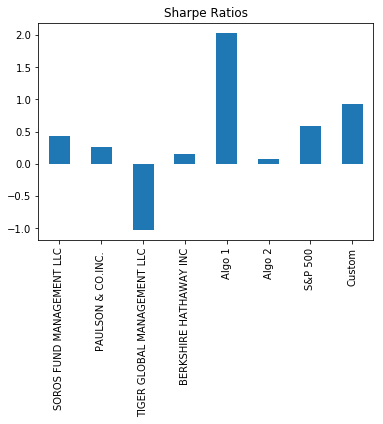

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind = 'bar')

In [42]:
# Create a correlation analysis
large_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


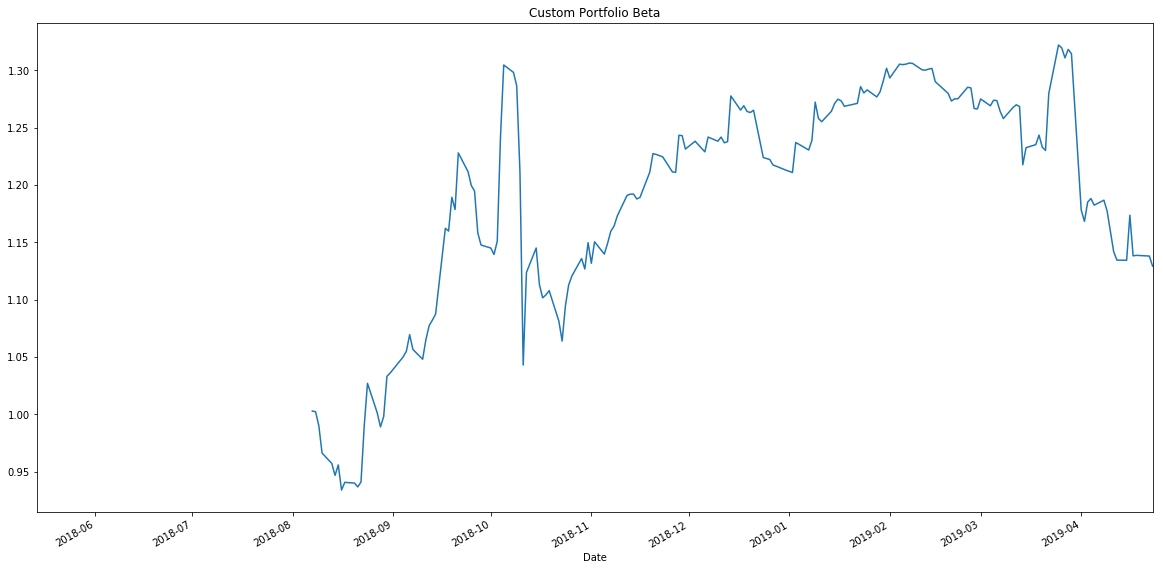

In [43]:
# Beta
# YOUR CODE HERE